<a href="https://colab.research.google.com/github/pedrolucas-sa/Artificial-intelligence-projects/blob/main/Atividades_MindSpores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [87]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [88]:
#Convertendo rótulos em variáveis.
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


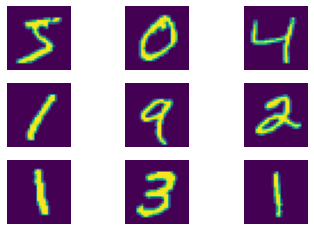

In [89]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i])
  #plt.ylabel(y[i].numpy())
  plt.axis('off')
plt.show()

In [90]:
##Converta uma imagem de 28 x 28 em um vetor de 784 x 1.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [91]:
#Normalize os valores de pixel da imagem
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [92]:
#Crie um modelo de rede neural profunda (DNN) que consiste em três camadas totalmente cone
model = keras.Sequential([
  layers.Dense(512, activation='relu', input_dim = 784),
  layers.Dense(256, activation='relu'),
  layers.Dense(124, activation='relu'),
  layers.Dense(num_classes, activation='softmax')])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [93]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=Optimizer,
metrics=['accuracy'])

In [94]:
#Ajuste os dados de treinamento ao modelo usando o método de ajuste.
model.fit(x_train, y_train,
batch_size=128,
epochs=10,
verbose=1)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2298 - accuracy: 0.9319
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0860 - accuracy: 0.9733
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0577 - accuracy: 0.9814
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0414 - accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0320 - accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0249 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0177 - accura

In [95]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07648326456546783
Test accuracy: 0.9812999963760376


In [96]:
model.save('./model/final_DNN_model.h5')

In [97]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model=keras.Sequential() #Crie a sequência da rede.
## Adicione a primeira camada convolucional e camada de pooling.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

## Adicione a segunda camada convolucional e camada de pooling.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation =tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
## Adicione uma camada de eliminação para reduzir o sobreajuste.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
## Adicione duas camadas totalmente conectadas.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

In [98]:
# Expanda as dimensões dos dados para se adaptar ao modelo CNN.
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 75s 158ms/step - loss: 0.2763 - accuracy: 0.9135
Epoch 2/5
469/469 [==============================] - 74s 157ms/step - loss: 0.0931 - accuracy: 0.9712
Epoch 3/5
469/469 [==============================] - 73s 155ms/step - loss: 0.0704 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 74s 157ms/step - loss: 0.0579 - accuracy: 0.9821
Epoch 5/5
469/469 [==============================] - 72s 154ms/step - loss: 0.0529 - accuracy: 0.9840


In [99]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0282 - accuracy: 0.9903
Test Accuracy 0.99


In [100]:
model.save('./model/final_CNN_model.h5')

In [101]:
from tensorflow.keras.models import load_model
new_model = load_model('./model/final_CNN_model.h5')
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
resultados de previsão das primeiras 20 imagens:
7,primeiras 20 imagens no conjunto de teste:
2,primeiras 20 imagens no conjunto de teste:
1,primeiras 20 imagens no conjunto de teste:
0,primeiras 20 imagens no conjunto de teste:
4,	
primeiras 20 imagens no conjunto de teste:
1,primeiras 20 imagens no conjunto de teste:
4,primeiras 20 imagens no conjunto de teste:
9,primeiras 20 imagens no conjunto de teste:
5,primeiras 20 imagens no conjunto de teste:
9,	
primeiras 20 imagens no conjunto de teste:
0,primeiras 20 imagens no conjunto de teste:
6,primeiras 20 imagens no conjunto de teste:
9,primeiras 20 imagens no conjunto de teste:
0,primeiras 20 imagens no conjunto de teste:
1,	
primeiras 20 imagens no conjunto de teste:
5,primeiras 20 imagens no conjunto de teste:
9,primeiras 20 imagens no conjunto de teste:
7,primeiras 20 imagens no conjunto de teste:
3,primeiras 20 imagens no conjunto de teste:
4,	
primeiras 20 imagens no conjunto de teste:


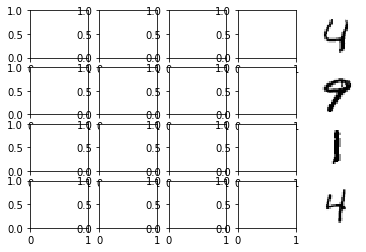

In [103]:
#Visualize os resultados de saída do conjunto de testes.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
  #final_opt_a=new_model.predict_classes(X_test[0:n])#Faça previsões no conjunto de test
  final_opt_a=np.argmax(new_model.predict(X_test[0:n]), axis=-1)#Faça previsões no conju
  print(final_opt_a)
  fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
  ax = ax.flatten()
  print('resultados de previsão das primeiras {} imagens:'.format(n))
  for i in range(n):
    print(final_opt_a[i],end=',')
    if int((i+1)%5) ==0:
      print('\t')
      #Visualize a exibição da imagem.
      img = X_test[i].reshape((28,28))#Leia cada linha de dados no formato da matriz (im
      plt.axis("off")
      ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualização
      ax[i].axis("off")
    print('primeiras {} imagens no conjunto de teste:'.format(n))
res_Visual(20)